# Processing TESS sector 10 data for TOI4504

In [1]:
%matplotlib inline
import sys
sys.path.append('../src/curvesimulator/')
from cs_flux_data import *
path = '../research/star_systems/TOI-4504/lightkurve/'

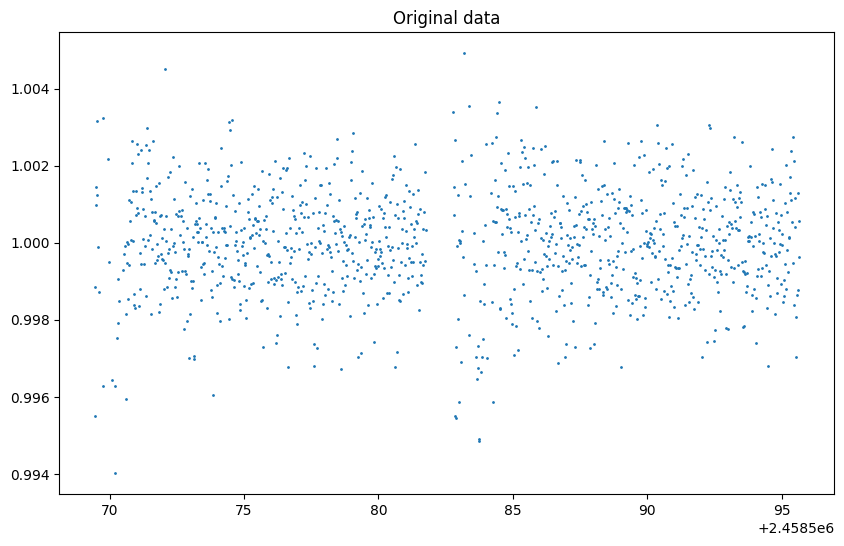

,time,flux,flux_err
0,2.458569e+06,0.995513,NaN
1,2.458569e+06,0.998850,NaN
2,2.458569e+06,1.000966,NaN
3,2.458570e+06,1.001449,NaN
4,2.458570e+06,1.003148,NaN
...,...,...,...
1144,2.458596e+06,0.998649,NaN
1145,2.458596e+06,1.001297,NaN
1146,2.458596e+06,0.998783,NaN
1147,2.458596e+06,0.999627,NaN


In [2]:
full_path = path+"10/10_TGLC_1800.csv"
df = csv2df(full_path)
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Original data")
df

In [3]:
df = calculate_flux_err(df, window_length=101)
df

,time,flux,flux_err
0,2.458569e+06,0.995513,0.002043
1,2.458569e+06,0.998850,0.002038
2,2.458569e+06,1.000966,0.002031
3,2.458570e+06,1.001449,0.002018
4,2.458570e+06,1.003148,0.001999
...,...,...,...
1144,2.458596e+06,0.998649,0.001256
1145,2.458596e+06,1.001297,0.001263
1146,2.458596e+06,0.998783,0.001275
1147,2.458596e+06,0.999627,0.001270


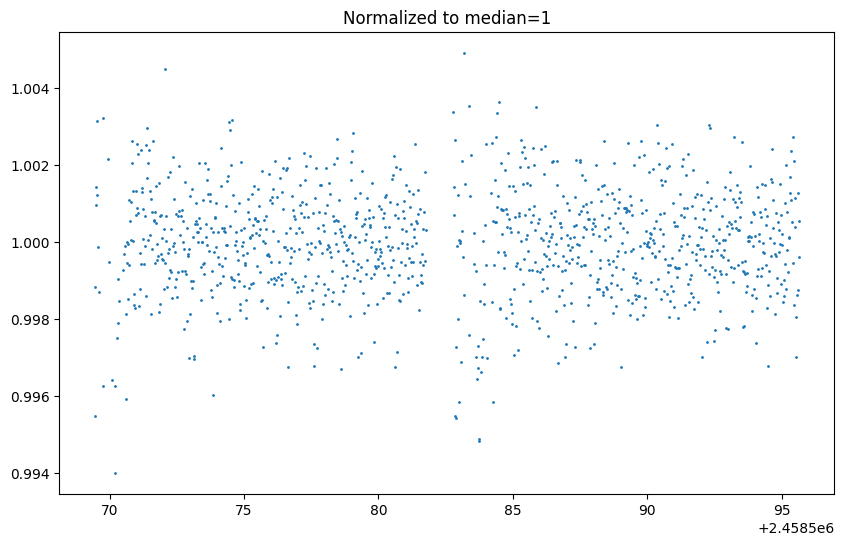

,time,flux,flux_err
0,2.458569e+06,0.995503,0.002043
1,2.458569e+06,0.998839,0.002038
2,2.458569e+06,1.000955,0.002031
3,2.458570e+06,1.001438,0.002018
4,2.458570e+06,1.003137,0.001999
...,...,...,...
1144,2.458596e+06,0.998638,0.001256
1145,2.458596e+06,1.001286,0.001263
1146,2.458596e+06,0.998772,0.001275
1147,2.458596e+06,0.999617,0.001270


In [4]:
median = median_flux(df)
df = scale_flux(df, 1/median)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1")
df

In [5]:
df2csv(df, full_path[:-4]+"_p.csv")